In [ ]:
import random  
import matplotlib.pyplot as plt  
    
# store the random numbers in a list  
nums = []  
mu = 0
sigma = 1.5
threes = 0
    
for i in range(10000):  
    temp = random.gauss(mu, sigma)
    if temp > -3 and temp < 3: threes += 1   
    nums.append(temp)  
        
# plotting a graph  
plt.hist(nums, bins = 200)  
plt.show()
print(threes/10000) 

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def main_lobe_gain(theta):
    g = 50 * np.power(np.cos(theta),57)
    return g-25

wanted_keys = ('theta', 'magdB')
mat = scipy.io.loadmat('ExampleDishFarfieldAz.mat')
pqr = pd.Series(mat)
mat_dict = {key : pqr.to_dict()[key] for key in wanted_keys}
theta = []
deg = []
magdB = []
zeroVal = 0

for i in range(0, len(mat_dict['theta'][0])):
    if mat_dict['theta'][0][i] == 0: zeroVal = mat_dict['magdB'][i][0]
    if mat_dict['theta'][0][i] < 0: 
        theta.append(np.deg2rad(mat_dict['theta'][0][i] + 360))
        deg.append(mat_dict['theta'][0][i]+360)
    else:
        theta.append(np.deg2rad(mat_dict['theta'][0][i]))
        deg.append(mat_dict['theta'][0][i])
    magdB.append(mat_dict['magdB'][i][0])

df = pd.DataFrame()

df["deg"] = deg
df["theta"] = theta
df["magdB"] = magdB

df = df.sort_values("deg")
print(df)

left_lobe_thetas = np.array(df['theta']) > np.pi/16 # and np.array(df['theta']) < (np.pi*2)-np.pi/16
right_lobe_thetas = np.array(df['theta']) < (np.pi*2)-np.pi/16
side_lobe_thetas = np.logical_and(left_lobe_thetas,right_lobe_thetas)

side_lobes = df['theta'][side_lobe_thetas]
lobes_dB = df['magdB'][side_lobe_thetas]

side_lobes = np.append(side_lobes,((np.pi*2)-np.pi/16))
side_lobes = np.insert(side_lobes,0,np.pi/16)

lobes_dB = np.append(lobes_dB,-9)
lobes_dB = np.insert(lobes_dB,0,-15)

figa = plt.figure()
bx = figa.add_subplot()
bx.plot(side_lobes,lobes_dB)

fig = plt.figure()
ax = fig.add_subplot(projection='polar')

coeffs = np.polyfit(side_lobes,lobes_dB,100,rcond=0)
p = np.poly1d(coeffs)

def gain(side_lobe_func, theta):
    theta = np.mod(theta, np.pi*2)
    theta_sides = np.logical_and(theta > np.pi/16, theta < 31*np.pi/16)
    main = np.logical_not(theta_sides)
    gain = np.zeros(thetas.shape)
    
    gain[theta_sides] = side_lobe_func(theta[theta_sides])
    gain[main] = main_lobe_gain(theta[main])
    
    return gain

thetas = np.linspace(0,(np.pi*2),1000)

rotation = np.pi/4

main_lobe_theta = np.linspace(0,np.pi*2,500)
main_lobe_theta = np.mod((main_lobe_theta), 2*np.pi)
theta = main_lobe_gain(main_lobe_theta)

r = np.mod(thetas + 1, 2*np.pi)
#ax.plot(df['theta'], df['magdB'])
#ax.plot(thetas,p(thetas))
#ax.plot(main_lobe_theta, mainlobe)

ax.plot(thetas,gain(p,thetas-(np.pi/4)))

c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)


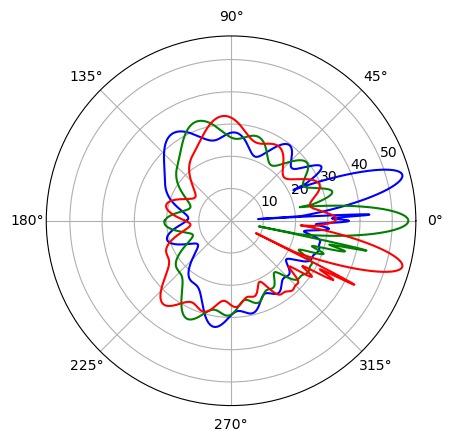

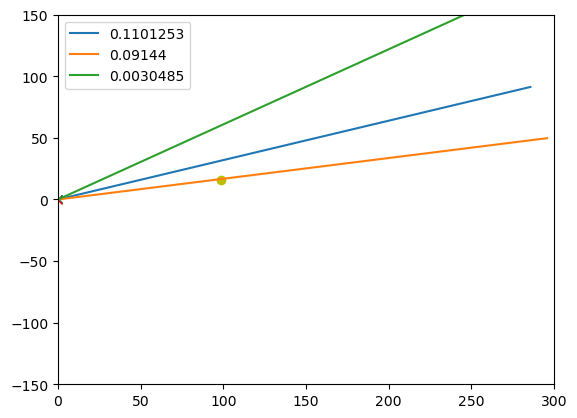

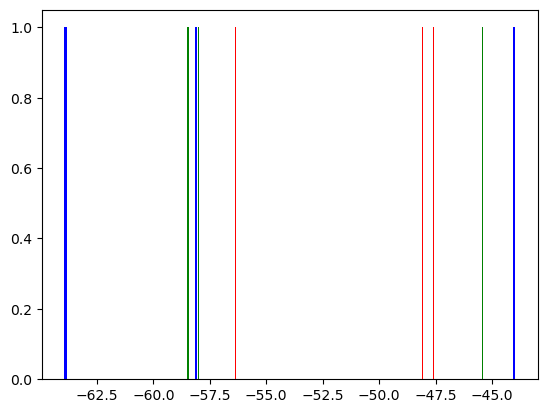

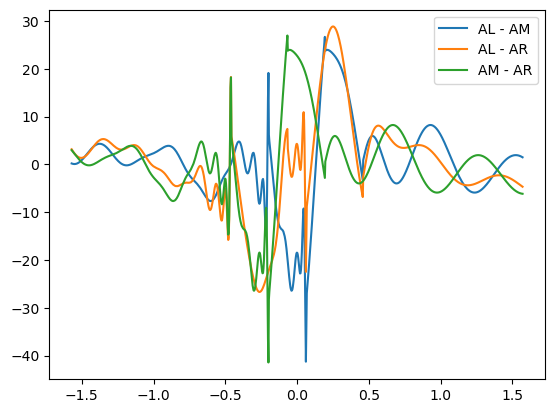

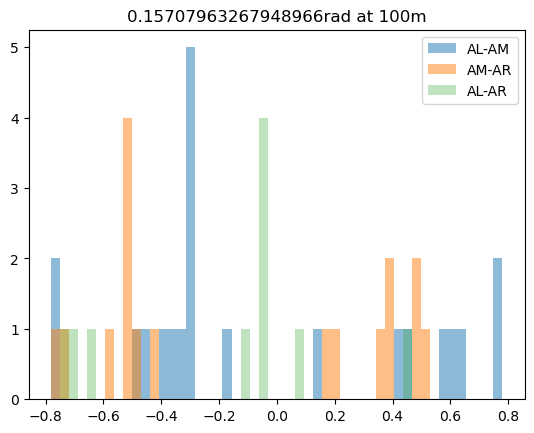

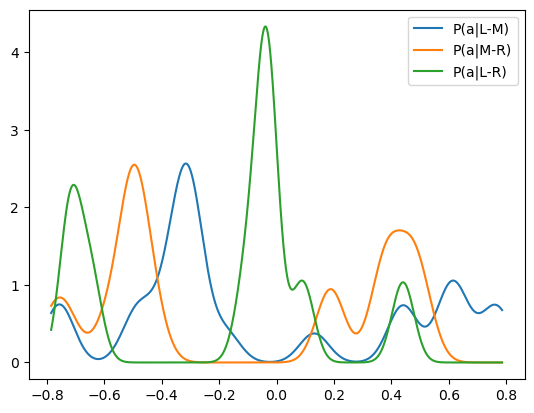

In [2]:
from Antenna import Antenna
from Array import Array
from Model import Model

import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = Model(np.pi/20,100,np.pi/12)
m.polar_plot()
m.spatial_plot()
m.plot_recieved_signals()
m.plot_all_mono_pairs(-np.pi/2,np.pi/2)
m.difference_distributions()
m.all_probability_distributions()

In [ ]:
from Antenna import Antenna
from Array import Array
from Model import Model

import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angles = np.linspace(0, np.pi/2, 5)

m = Model(np.pi/16, 100, 0)

for angle in angles:
    m.set_antenna_separation(angle)
    m.polar_plot()
    m.estimate_angle()

In [ ]:
from scipy.stats import norm

x = [10,4,4,1,10,4,0,4,4,4,10]
y = [1,2,3,4,5,6,7,8,9,10,11]
a = norm(10,5).cdf(x)
a /= np.sum(a)

plt.figure()
plt.subplot()
plt.plot(y,a)

c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)


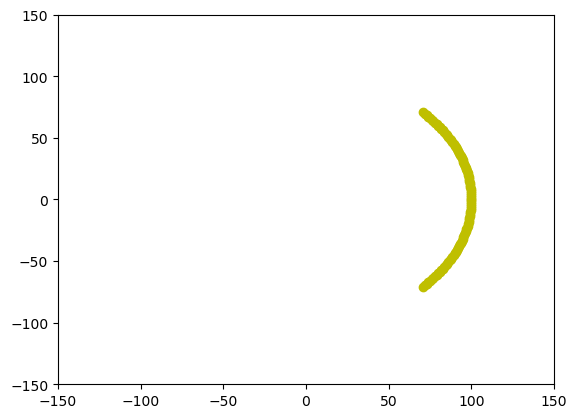

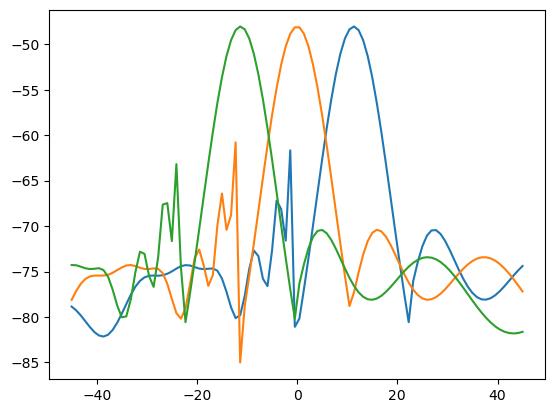

In [1]:
import timeit
from Evaluation import Evaluation
from Model import Model
import numpy as np

m = Model(np.pi/4,100,np.pi/16)

m.test_at_100()

In [4]:
import numpy as np
from Model import Model

m = Model(np.pi/12,100,np.pi/8)

m.MAE(0)

ValueError: cannot call `vectorize` on size 0 inputs unless `otypes` is set

In [ ]:
from Evaluation import Evaluation
from Model import Model
import numpy as np
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

it = 500


m = Model(0,1200,0.244,ant_types=("narrow","narrow","narrow"),eval_iterations=it)
m.polar_plot()
eval = Evaluation(m,0.1,0.4,100,-np.pi/6,np.pi/6,200,it,"PROB")
eval.model.set_antenna_separation(0.2242)
fig = plt.figure()
ax = plt.subplot()
ax.set_xlim
ax.set_title("n,n,n")
eval.eval_prob(ax)

c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Pr

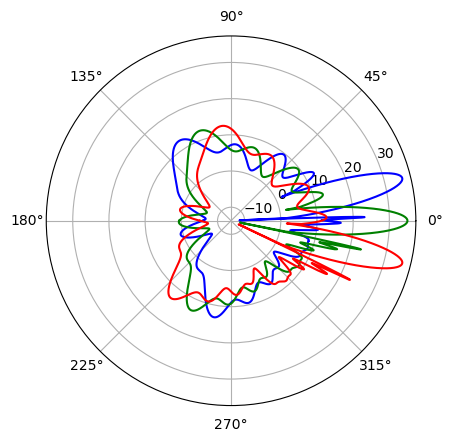

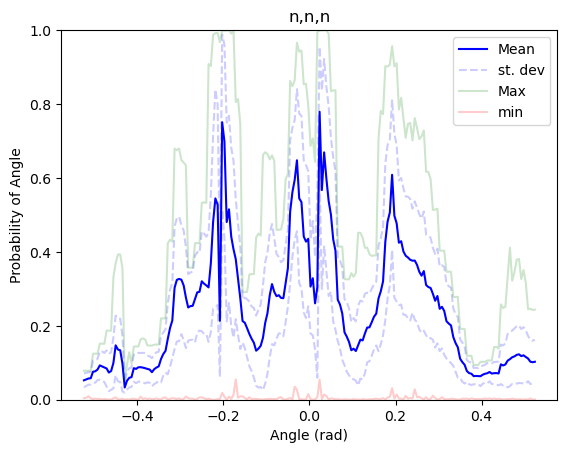

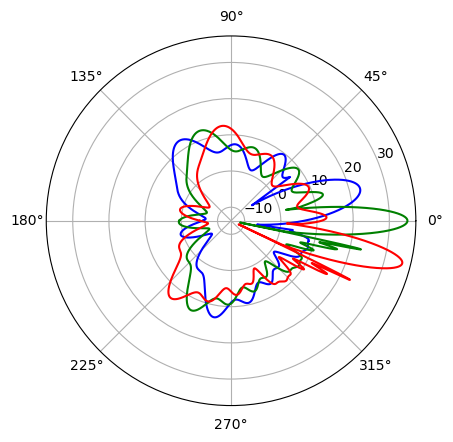

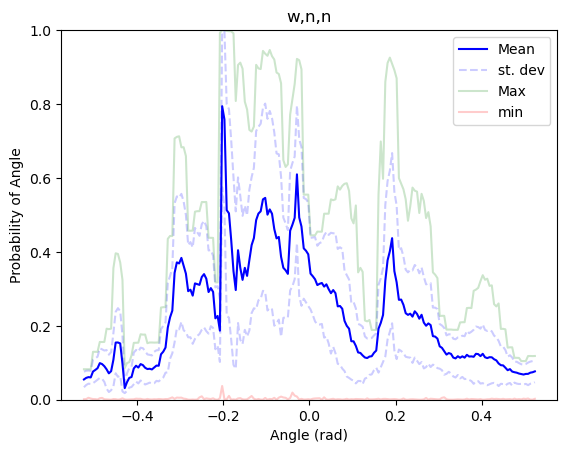

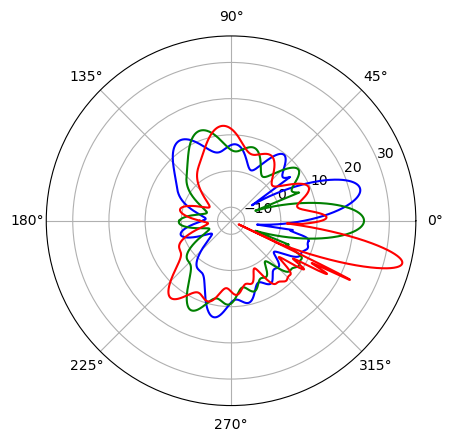

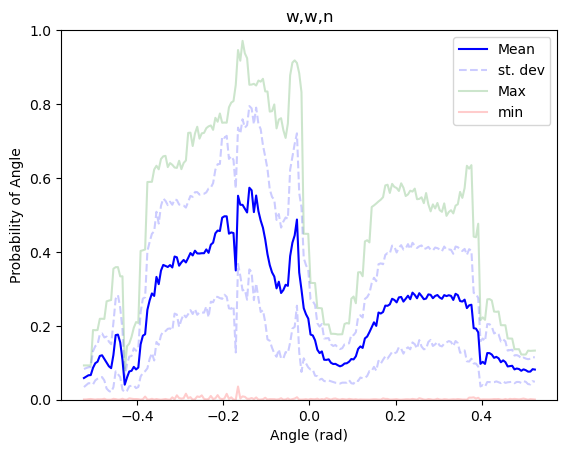

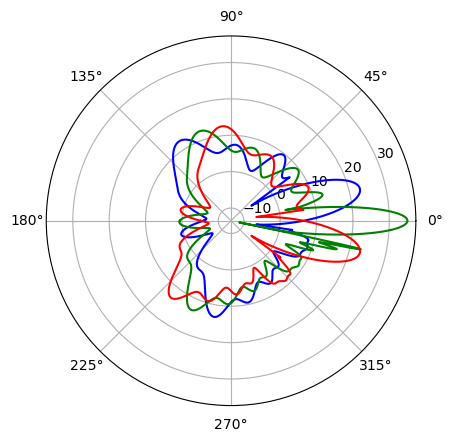

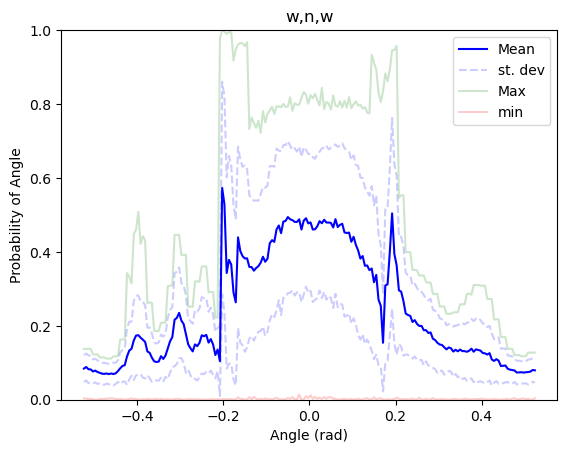

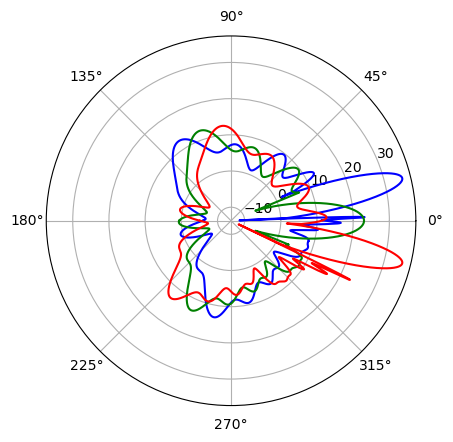

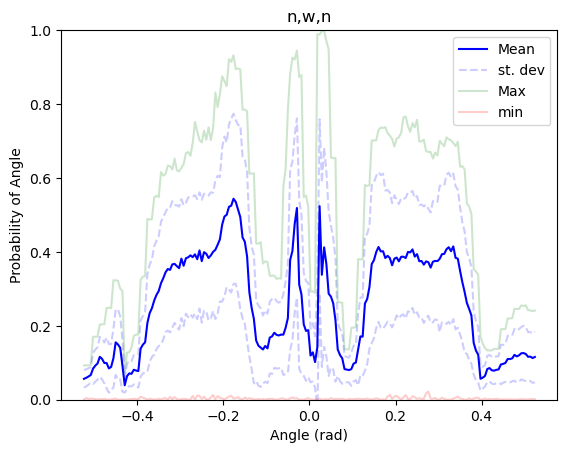

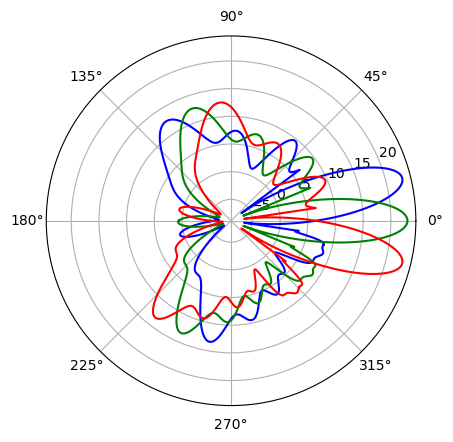

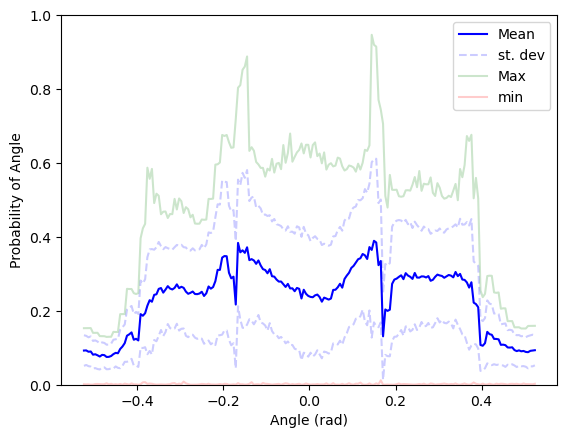

In [3]:
from Evaluation import Evaluation
from Model import Model
import numpy as np
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

it = 500


m = Model(0,100,0.244,ant_types=("narrow","narrow","narrow"),eval_iterations=it)
m.polar_plot()
eval = Evaluation(m,0.1,0.4,100,-np.pi/6,np.pi/6,200,it,"PROB")
eval.model.set_antenna_separation(0.2242)
fig = plt.figure()
ax = plt.subplot()
ax.set_xlim
ax.set_title("n,n,n")
eval.eval_prob(ax)

m = Model(0,100,0.244,ant_types=("wide","narrow","narrow"),eval_iterations=it)
m.polar_plot()
eval = Evaluation(m,0.1,0.4,100,-np.pi/6,np.pi/6,200,it,"PROB")
eval.model.set_antenna_separation(0.2242)
fig = plt.figure()
ax = plt.subplot()
ax.set_xlim
ax.set_title("w,n,n")
eval.eval_prob(ax)


m = Model(0,100,0.244,ant_types=("wide","wide","narrow"),eval_iterations=it)
m.polar_plot()
eval = Evaluation(m,0.1,0.4,100,-np.pi/6,np.pi/6,200,it,"PROB")
eval.model.set_antenna_separation(0.2242)
fig = plt.figure()
ax = plt.subplot()
ax.set_xlim
ax.set_title("w,w,n")
eval.eval_prob(ax)

m = Model(0,100,0.244,ant_types=("wide","narrow","wide"),eval_iterations=it)
m.polar_plot()
eval = Evaluation(m,0.1,0.4,100,-np.pi/6,np.pi/6,200,it,"PROB")
eval.model.set_antenna_separation(0.2242)
fig = plt.figure()
ax = plt.subplot()
ax.set_xlim
ax.set_title("w,n,w")
eval.eval_prob(ax)

m = Model(0,100,0.244,ant_types=("narrow","wide","narrow"),eval_iterations=it)
m.polar_plot()
eval = Evaluation(m,0.1,0.4,100,-np.pi/6,np.pi/6,200,it,"PROB")
eval.model.set_antenna_separation(0.2242)
fig = plt.figure()
ax = plt.subplot()
ax.set_xlim
ax.set_title("n,w,n")
eval.eval_prob(ax)

m = Model(0,100,0.244,ant_types=("wide","wide","wide"),eval_iterations=it)
m.polar_plot()
eval = Evaluation(m,0.1,0.4,100,-np.pi/6,np.pi/6,200,it,"PROB")
eval.model.set_antenna_separation(0.2242)
fig = plt.figure()
ax = plt.subplot()
ax.set_xlim
eval.eval_prob(ax)

#Negative Log Predicted Density


c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)


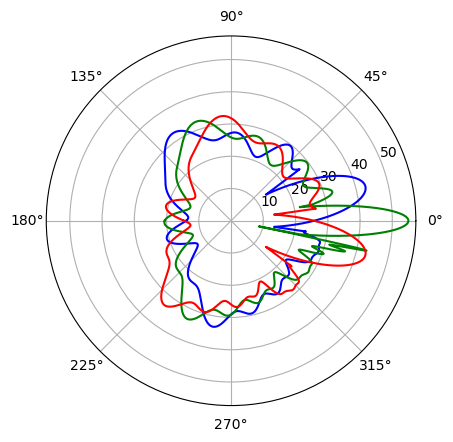

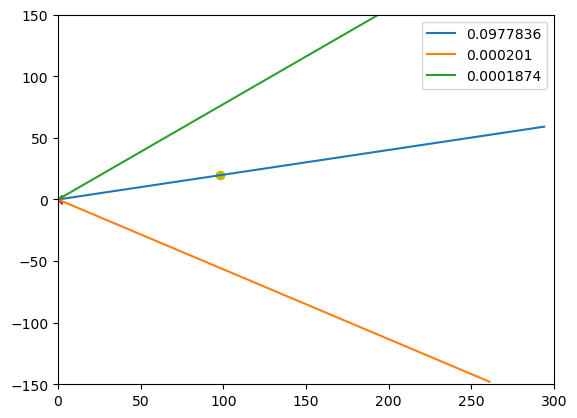

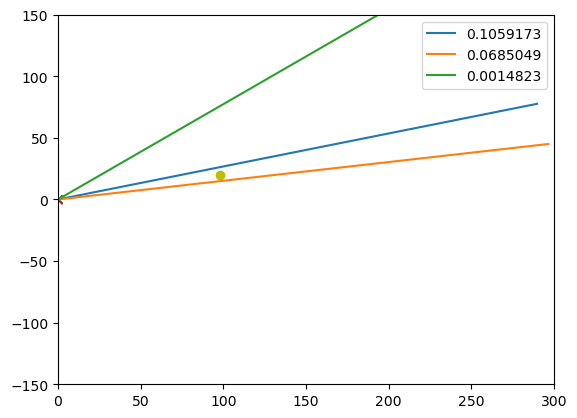

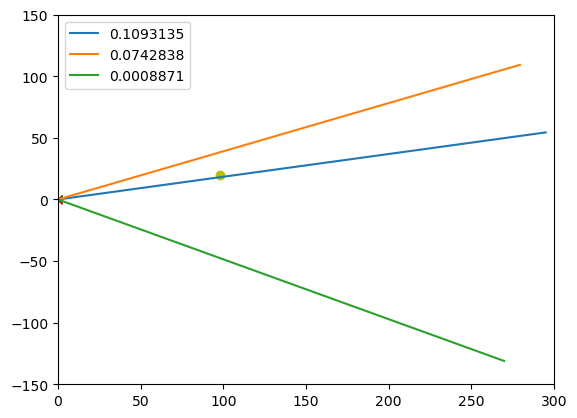

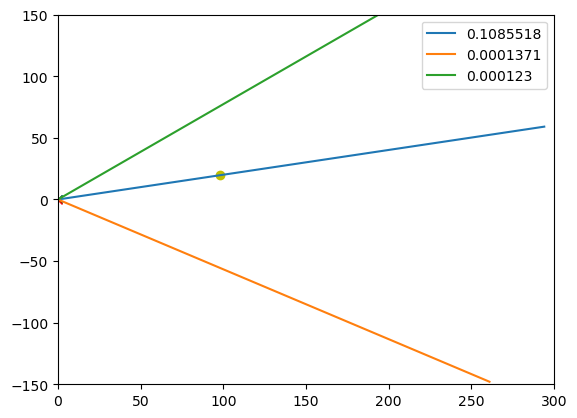

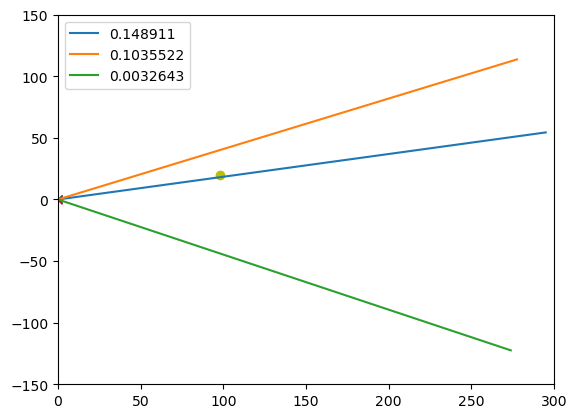

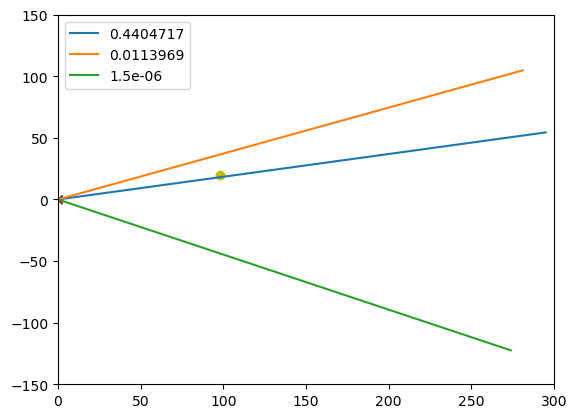

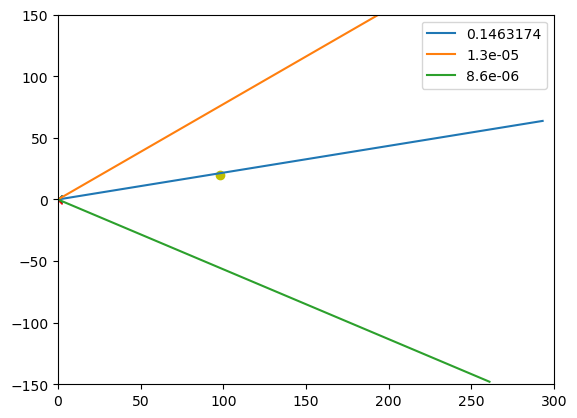

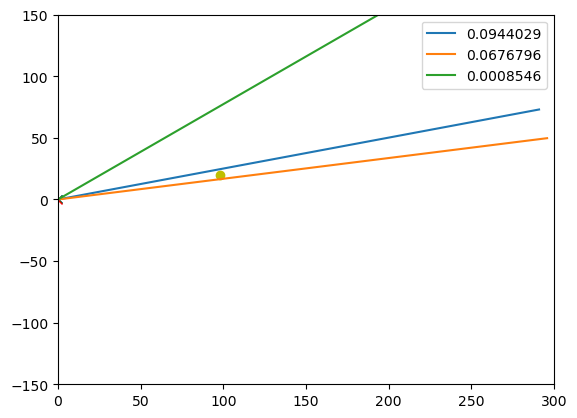

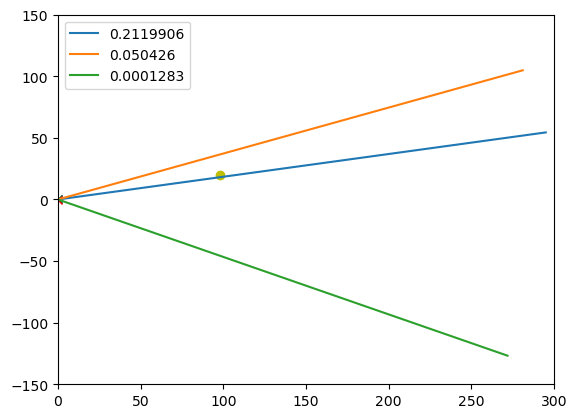

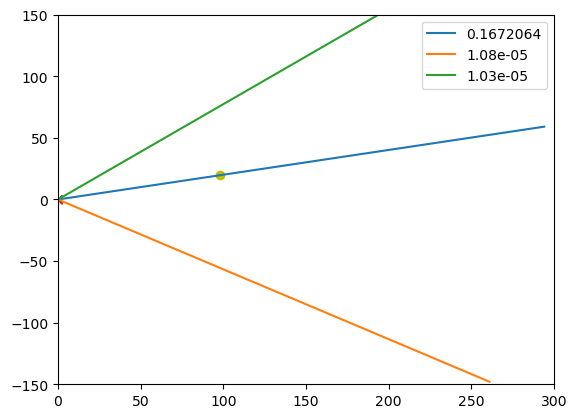

In [1]:
from Antenna import Antenna
from Array import Array
from Model import Model

import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = Model(0,100,0.251,ant_types=("wide","narrow","wide"))
m.polar_plot()

for i in range(10):
    m.set_reciver_angle(np.pi/16)
    m.spatial_plot()

In [ ]:
from Antenna import Antenna
from Array import Array
from Model import Model

import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = Model(0,100, 0.261)
high = np.pi
low = -np.pi
'''
for angle in np.linspace(low,high,40):
    m.set_reciver_angle(angle)
    m.estimate_angle_vector(high,low)"
'''
a = np.linspace(-0.2,0.2,50)

for angle in a:
    m.angle_analysis(1)
    m.set_reciver_angle(angle)
    m.plot_estimation_vectors(np.pi,-np.pi)
    
#Rejection sampling
#exponential equal to 1 for pattern
#Should add up to 2pi
#Angle optimisation
    
#probability of actual angle given pdf over range
#probability  anlge-step < angle < + step
#repeat 100timeofs for each angle
#repeat for linspace -np.pi/4 np.pi/4, 500
#500 * 100 = 50000

In [ ]:
from Antenna import Antenna
from Array import Array
from Model import Model

import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

model = Model()

signals = np.empty(2000)
signals.fill(-30)
signals = model.gauss_noise(signals)
ax = plt.subplot()
ax.hist(signals, bins=100)